In [11]:
from   hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
DATA =  '../../../data'

In [6]:
nile = pd.read_csv(f'{DATA}/Nile.csv', index_col=0)
print(nile.shape)
nile.head()

(100, 2)


,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


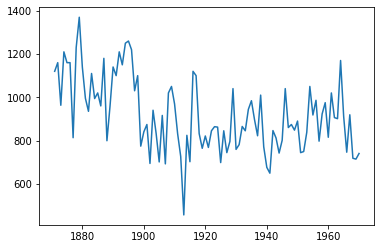

In [8]:
plt.plot(nile.year, nile.val);

In [12]:
vals = np.expand_dims(nile.val.values, 1)
N_STATES = 2
mod = GaussianHMM(n_components=N_STATES, n_iter=100).fit(vals)
hidden_states = mod.predict(vals)

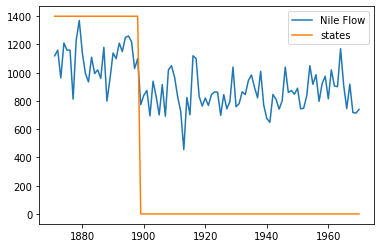

In [14]:
plt.plot(nile.year, nile.val, label='Nile Flow')
plt.plot(nile.year, 1400 * hidden_states, label='states')
plt.legend();

In [129]:
def relabel_states(hidden_states, means, sds):
    means = np.array(means)
    sds = np.array(sds)
    preds = np.array([means[state] for state in hidden_states])
    ses = np.array([1.96 * sds[state] for state in hidden_states])
    return preds, ses

In [158]:
def fit_hmm(vals, n_states, n_iter=1000):
    vals = np.reshape(vals, [-1, 1])
    mod = GaussianHMM(n_components=n_states, n_iter=n_iter).fit(vals)
    hidden_states = mod.predict(vals)
    means = np.squeeze(mod.means_)
    sds = np.squeeze(np.sqrt(mod.covars_))
    trans_mat = np.array(mod.transmat_)
    preds, ses = relabel_states(hidden_states, means, sds)
    return preds, ses, hidden_states, trans_mat, means, mod

In [159]:
preds, ses, hidden_states, trans_mat, means, mod = fit_hmm(
    nile.val.values, 2)

In [160]:
def plot_states(ts, times, preds, ses):
    plt.plot(times, ts, color='r')
    plt.xlabel('Time')
    plt.ylabel('TS Value')
    plt.plot(times, preds, color='b', alpha=0.5)
    plt.plot(times, preds + ses, color='b', linestyle='-.', alpha=0.5)
    plt.plot(times, preds - ses, color='b', linestyle='-.', alpha=0.5)

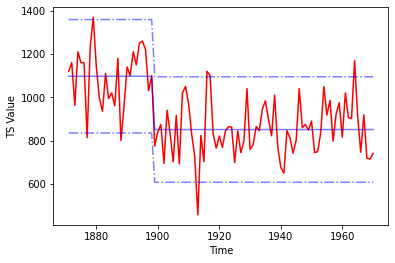

In [161]:
plot_states(nile.val, nile.year, preds, ses)

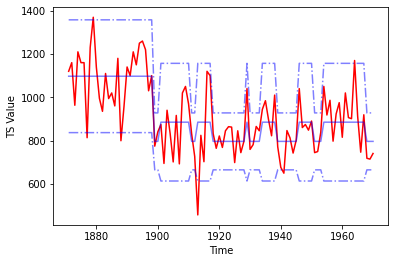

In [162]:
preds, ses, hidden_states, trans_mat, means, mod = fit_hmm(
    nile.val.values, 3)
plot_states(nile.val, nile.year, preds, ses)

In [148]:
trans_mat.round(3)

array([[0.695, 0.305, 0.   ],
       [0.492, 0.508, 0.   ],
       [0.   , 0.036, 0.964]])

In [152]:
means

array([ 884.87213564,  796.06732375, 1097.27216026])

In [149]:
current_state = hidden_states[-1]
current_state

1

In [151]:
expected_val = np.dot(trans_mat[current_state, :], means)
print(expected_val)

839.7463448531698


In [154]:
884.827*0.492 + 796.067*0.508

839.73692

In [157]:
# Log probability (higher is better)
mod.score(np.reshape(nile.val.values, [len(nile.val.values), 1]))

-627.6836806095122